In [10]:
import sys
import os
sys.path.insert(0, '../../')
import plots
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

analyzer = plots.DataAnalyser()

plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 14})

df = pd.read_csv('dataset_metadata_candidate3.csv')

def r2(x,y,deg):
    # Linear regression (1st-degree polynomial)
    coeffs = np.polyfit(x, y, deg)
    model = np.poly1d(coeffs)
    y_pred = model(x)


    # R-squared calculation
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    r_squared_2 = r2_score(y, y_pred)

    if np.abs(r_squared - r_squared_2) > 0.01: raise Exception('error in R2')

    # Print R²
    print(f"R²: {r_squared:.4f}")
    return model


In [11]:
df_circle = df[df['trajectory_type'] == 'circle_xy']
df_lissajous = df[df['trajectory_type'] == 'lissajous_xy']

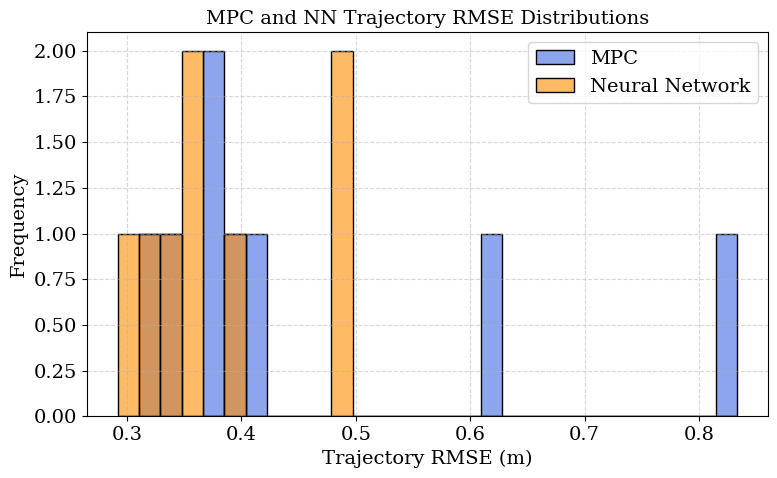

In [12]:
analyzer.plot_histogram(df_circle,'mpc_RMSe','nn_RMSe','Trajectory RMSE (m)','MPC and NN Trajectory RMSE Distributions', legend=['MPC','Neural Network'],stat='count',show_mean=False)

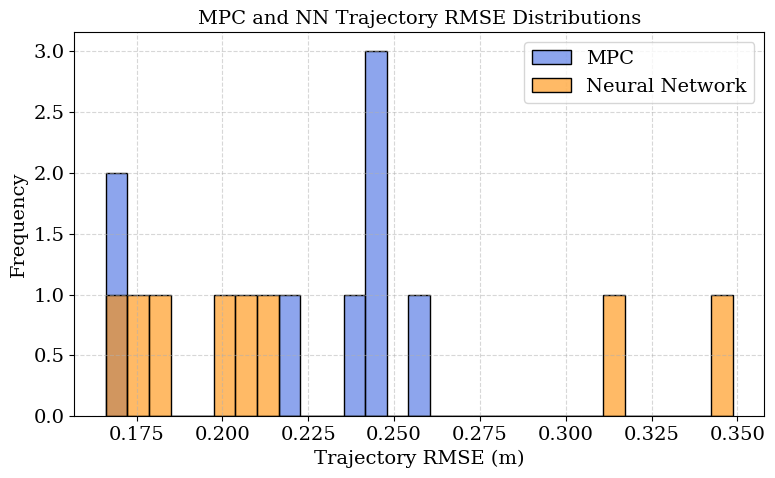

In [13]:
analyzer.plot_histogram(df_lissajous,'mpc_RMSe','nn_RMSe','Trajectory RMSE (m)','MPC and NN Trajectory RMSE Distributions', legend=['MPC','Neural Network'],stat='count',show_mean=False)

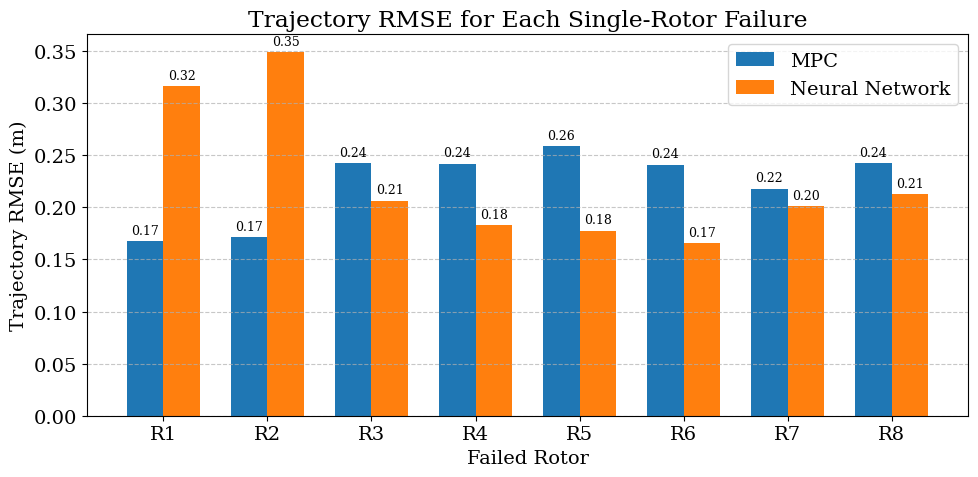

In [14]:
rotors = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']
x = np.arange(len(rotors))  # label locations
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - width/2, df_lissajous['mpc_RMSe'], width, label='MPC', color='tab:blue')
bars2 = ax.bar(x + width/2, df_lissajous['nn_RMSe'], width, label='Neural Network', color='tab:orange')

# Labels and formatting
ax.set_ylabel('Trajectory RMSE (m)')
ax.set_xlabel('Failed Rotor')
ax.set_title('Trajectory RMSE for Each Single-Rotor Failure')
ax.set_xticks(x)
ax.set_xticklabels(rotors)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Optionally annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('barplot_lisajous.pdf')

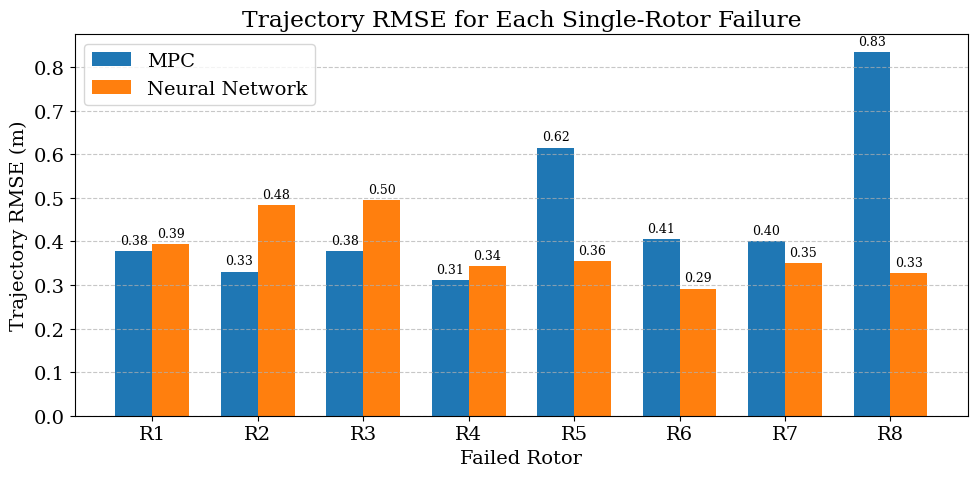

In [15]:
rotors = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']
x = np.arange(len(rotors))  # label locations
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - width/2, df_circle['mpc_RMSe'], width, label='MPC', color='tab:blue')
bars2 = ax.bar(x + width/2, df_circle['nn_RMSe'], width, label='Neural Network', color='tab:orange')

# Labels and formatting
ax.set_ylabel('Trajectory RMSE (m)')
ax.set_xlabel('Failed Rotor')
ax.set_title('Trajectory RMSE for Each Single-Rotor Failure')
ax.set_xticks(x)
ax.set_xticklabels(rotors)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Optionally annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('barplot_circle.pdf')

C:\Users\mathe\AppData\Local\Temp\ipykernel_72192\104968114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lissajous['nn_max_abs_phi'] = np.max(np.abs(df[['nn_max_phi (rad)','nn_min_phi (rad)']]), axis = 1)
C:\Users\mathe\AppData\Local\Temp\ipykernel_72192\104968114.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lissajous['mpc_max_abs_phi'] = np.max(np.abs(df[['mpc_max_phi (rad)','mpc_min_phi (rad)']]), axis = 1)
C:\Users\mathe\AppData\Local\Temp\ipykernel_72192\104968114.py:5: SettingWithCo

Text(0, 0.5, 'Trajectory RMSE (m)')

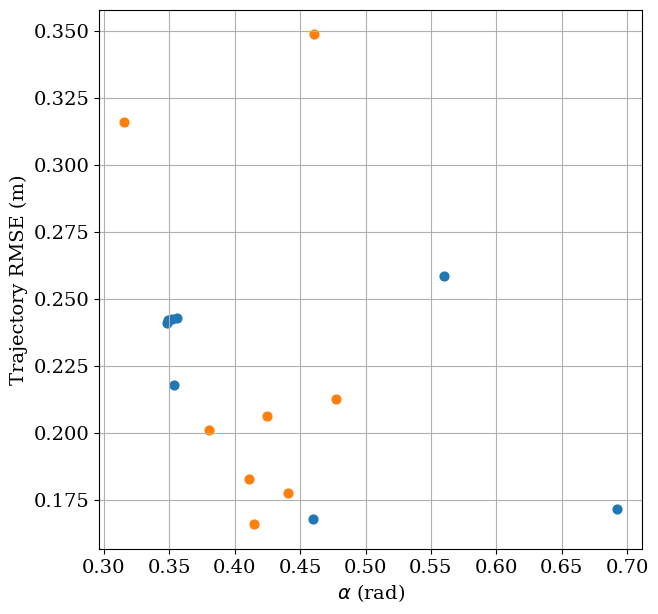

In [16]:
fig = plt.figure(figsize=(7,7))

df_lissajous['nn_max_abs_phi'] = np.max(np.abs(df[['nn_max_phi (rad)','nn_min_phi (rad)']]), axis = 1)
df_lissajous['mpc_max_abs_phi'] = np.max(np.abs(df[['mpc_max_phi (rad)','mpc_min_phi (rad)']]), axis = 1)
df_lissajous['nn_max_abs_theta'] = np.max(np.abs(df[['nn_max_theta (rad)','nn_min_theta (rad)']]), axis = 1)
df_lissajous['mpc_max_abs_theta'] = np.max(np.abs(df[['mpc_max_theta (rad)','mpc_min_theta (rad)']]), axis = 1)
df_lissajous['nn_max_abs_psi'] = np.max(np.abs(df[['nn_max_psi (rad)','nn_min_psi (rad)']]), axis = 1)
df_lissajous['mpc_max_abs_psi'] = np.max(np.abs(df[['mpc_max_psi (rad)','mpc_min_psi (rad)']]), axis = 1)

s=40
plt.scatter((df_lissajous['mpc_max_abs_phi'] + 0*df_lissajous['mpc_max_abs_theta'] + 0*df_lissajous['mpc_max_abs_psi'])/1,df_lissajous['mpc_RMSe'],s=s)
plt.scatter((df_lissajous['nn_max_abs_phi'] + 0*df_lissajous['nn_max_abs_theta'] + 0*df_lissajous['nn_max_abs_psi'])/1,df_lissajous['nn_RMSe'],s=s)
plt.grid()

plt.xlabel('$\\alpha$ (rad)')
plt.ylabel('Trajectory RMSE (m)')

#r2((df['mpc_max_abs_phi'] + df['mpc_max_abs_theta'] + df['mpc_max_abs_psi'])/3,df['mpc_RMSe'],1)

Text(0, 0.5, 'Trajectory RMSE (m)')

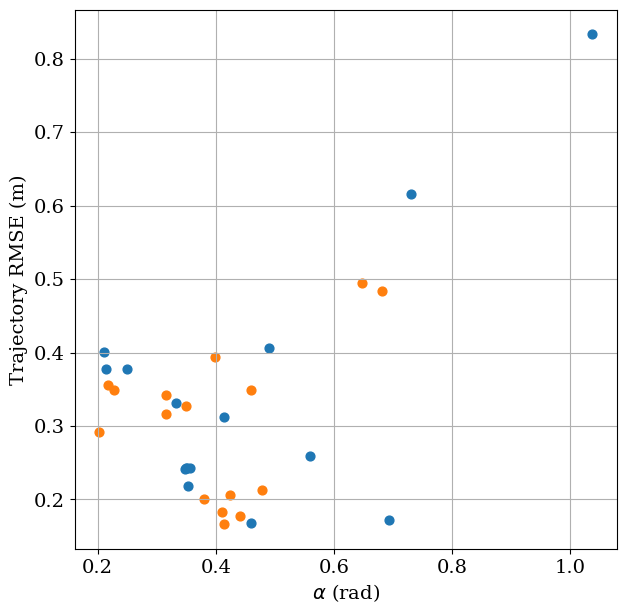

In [17]:
fig = plt.figure(figsize=(7,7))

df['nn_max_abs_phi'] = np.max(np.abs(df[['nn_max_phi (rad)','nn_min_phi (rad)']]), axis = 1)
df['mpc_max_abs_phi'] = np.max(np.abs(df[['mpc_max_phi (rad)','mpc_min_phi (rad)']]), axis = 1)
df['nn_max_abs_theta'] = np.max(np.abs(df[['nn_max_theta (rad)','nn_min_theta (rad)']]), axis = 1)
df['mpc_max_abs_theta'] = np.max(np.abs(df[['mpc_max_theta (rad)','mpc_min_theta (rad)']]), axis = 1)
df['nn_max_abs_psi'] = np.max(np.abs(df[['nn_max_psi (rad)','nn_min_psi (rad)']]), axis = 1)
df['mpc_max_abs_psi'] = np.max(np.abs(df[['mpc_max_psi (rad)','mpc_min_psi (rad)']]), axis = 1)

s=40
plt.scatter((df['mpc_max_abs_phi'] + 0*df['mpc_max_abs_theta'] + 0*df['mpc_max_abs_psi'])/1,df['mpc_RMSe'],s=s)
plt.scatter((df['nn_max_abs_phi'] + 0*df['nn_max_abs_theta'] + 0*df['nn_max_abs_psi'])/1,df['nn_RMSe'],s=s)
plt.grid()

plt.xlabel('$\\alpha$ (rad)')
plt.ylabel('Trajectory RMSE (m)')

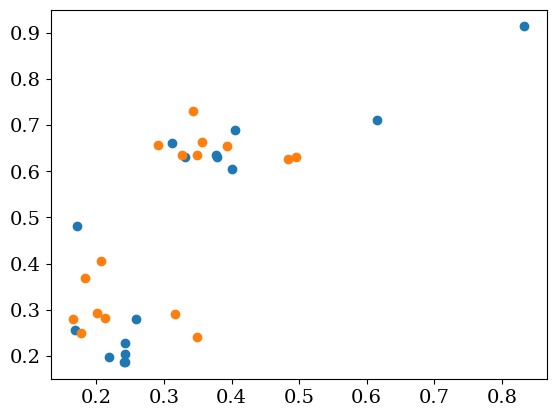

In [18]:
plt.scatter(df['mpc_RMSe'],df['mpc_max_abs_theta'])
plt.scatter(df['nn_RMSe'],df['nn_max_abs_theta'])

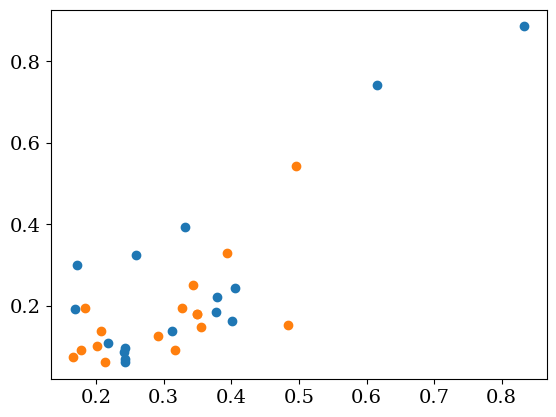

In [19]:
plt.scatter(df['mpc_RMSe'],df['mpc_max_abs_psi'])
plt.scatter(df['nn_RMSe'],df['nn_max_abs_psi'])

In [20]:
df.sort_values('mpc_max_abs_phi',ascending=False)[['sim_id','trajectory_type','failed_rotors','mpc_RMSe','mpc_max_abs_phi']]

,sim_id,trajectory_type,failed_rotors,mpc_RMSe,mpc_max_abs_phi
7,8,circle_xy,7,0.833285,1.037676
4,5,circle_xy,4,0.615249,0.730304
9,2,lissajous_xy,1,0.171827,0.692463
12,5,lissajous_xy,4,0.258521,0.560255
5,6,circle_xy,5,0.405791,0.490401
8,1,lissajous_xy,0,0.168019,0.459495
3,4,circle_xy,3,0.311892,0.413276
15,8,lissajous_xy,7,0.242775,0.355665
14,7,lissajous_xy,6,0.218099,0.353606
10,3,lissajous_xy,2,0.242444,0.352108


C:\Users\mathe\AppData\Local\Temp\ipykernel_72192\1250402399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lissajous['nn_max_abs_phi'] = np.max(np.abs(df[['nn_max_phi (rad)','nn_min_phi (rad)']]), axis = 1)
C:\Users\mathe\AppData\Local\Temp\ipykernel_72192\1250402399.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lissajous['mpc_max_abs_phi'] = np.max(np.abs(df[['mpc_max_phi (rad)','mpc_min_phi (rad)']]), axis = 1)
C:\Users\mathe\AppData\Local\Temp\ipykernel_72192\1250402399.py:5: SettingWit

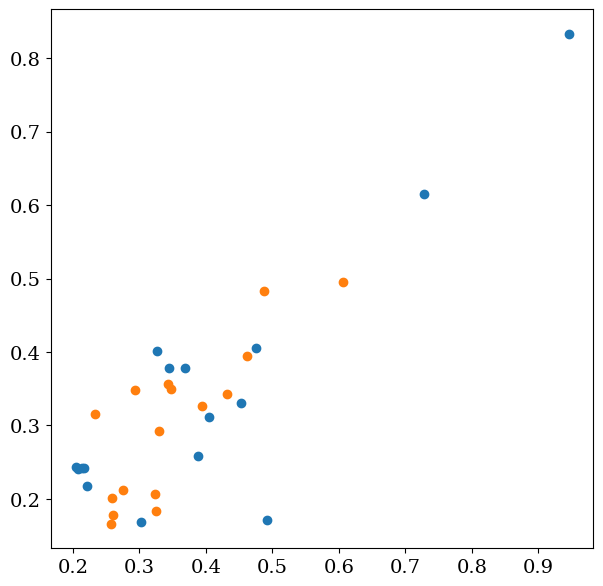

In [21]:
fig = plt.figure(figsize=(7,7))

df_lissajous['nn_max_abs_phi'] = np.max(np.abs(df[['nn_max_phi (rad)','nn_min_phi (rad)']]), axis = 1)
df_lissajous['mpc_max_abs_phi'] = np.max(np.abs(df[['mpc_max_phi (rad)','mpc_min_phi (rad)']]), axis = 1)
df_lissajous['nn_max_abs_theta'] = np.max(np.abs(df[['nn_max_theta (rad)','nn_min_theta (rad)']]), axis = 1)
df_lissajous['mpc_max_abs_theta'] = np.max(np.abs(df[['mpc_max_theta (rad)','mpc_min_theta (rad)']]), axis = 1)
df_lissajous['nn_max_abs_psi'] = np.max(np.abs(df[['nn_max_psi (rad)','nn_min_psi (rad)']]), axis = 1)
df_lissajous['mpc_max_abs_psi'] = np.max(np.abs(df[['mpc_max_psi (rad)','mpc_min_psi (rad)']]), axis = 1)

plt.scatter((df['mpc_max_abs_phi'] + df['mpc_max_abs_theta'] + df['mpc_max_abs_psi'])/3,df['mpc_RMSe'])
plt.scatter((df['nn_max_abs_phi'] + df['nn_max_abs_theta'] + df['nn_max_abs_psi'])/3,df['nn_RMSe'])

In [22]:
df.sort_values('mpc_RMSe',ascending=True)[['trajectory_type','failed_rotors','mpc_max_abs_phi']]

,trajectory_type,failed_rotors,mpc_max_abs_phi
8,lissajous_xy,0,0.459495
9,lissajous_xy,1,0.692463
14,lissajous_xy,6,0.353606
13,lissajous_xy,5,0.348284
11,lissajous_xy,3,0.348951
10,lissajous_xy,2,0.352108
15,lissajous_xy,7,0.355665
12,lissajous_xy,4,0.560255
3,circle_xy,3,0.413276
1,circle_xy,1,0.332285


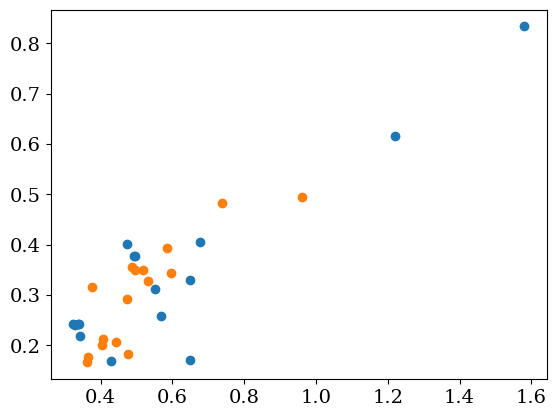

In [23]:
mpc_range_phi = np.abs(df['mpc_max_phi (rad)'] - df['mpc_min_phi (rad)'])
mpc_range_theta = np.abs(df['mpc_max_theta (rad)'] - df['mpc_min_theta (rad)'])
mpc_range_psi = np.abs(df['mpc_max_psi (rad)'] - df['mpc_min_psi (rad)'])

mpc_mean_range = (mpc_range_phi + mpc_range_theta + mpc_range_psi)/3

nn_range_phi = np.abs(df['nn_max_phi (rad)'] - df['nn_min_phi (rad)'])
nn_range_theta = np.abs(df['nn_max_theta (rad)'] - df['nn_min_theta (rad)'])
nn_range_psi = np.abs(df['nn_max_psi (rad)'] - df['nn_min_psi (rad)'])

nn_mean_range = (nn_range_phi + nn_range_theta + nn_range_psi)/3

plt.scatter(mpc_mean_range,df['mpc_RMSe'])
plt.scatter(nn_mean_range,df['nn_RMSe'])